# Multiple Regression

Configure the project. Indeed you create a dataset in csv format.

In [6]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! head -n 1 *.csv | head -n 2 | tail -n 1 > data.csv && for file in *.csv; do (tail -n +2 "$file"; echo) >> data.csv; done && sed -i '/^$/d' data.csv

Archive:  ./dataset/archive.zip
  inflating: Student_Performance.csv  


Import needed libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [2]:
df = pd.read_csv("data.csv")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,5,69,No,8,2,51.0
1,2,46,Yes,4,8,20.0
2,7,56,Yes,7,5,46.0
3,6,42,Yes,8,5,28.0
4,7,53,No,4,6,41.0


In [3]:
# summarize data
df.describe() 

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


Print the histogram chart of data

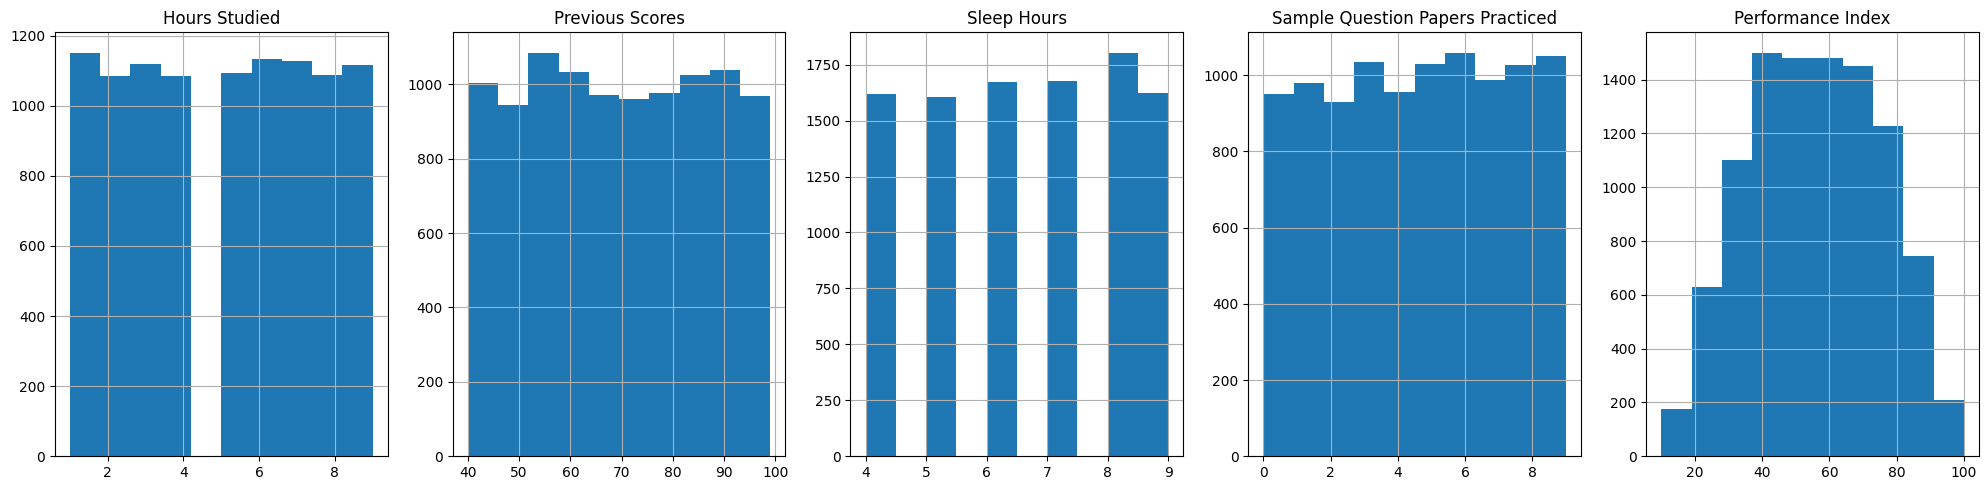

In [5]:
viz = df[["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))  # Adjust the figsize as needed

# Plot histograms for each column
for i, column in enumerate(viz.columns):
    viz[column].hist(ax=axes[i])
    axes[i].set_title(column)

# Display the plots
plt.tight_layout()
plt.show()

Print scatter chart of data to recognize the patterns of data. Based on the below chart we must answer to this question "Is Linear Simple Regression good or not?"

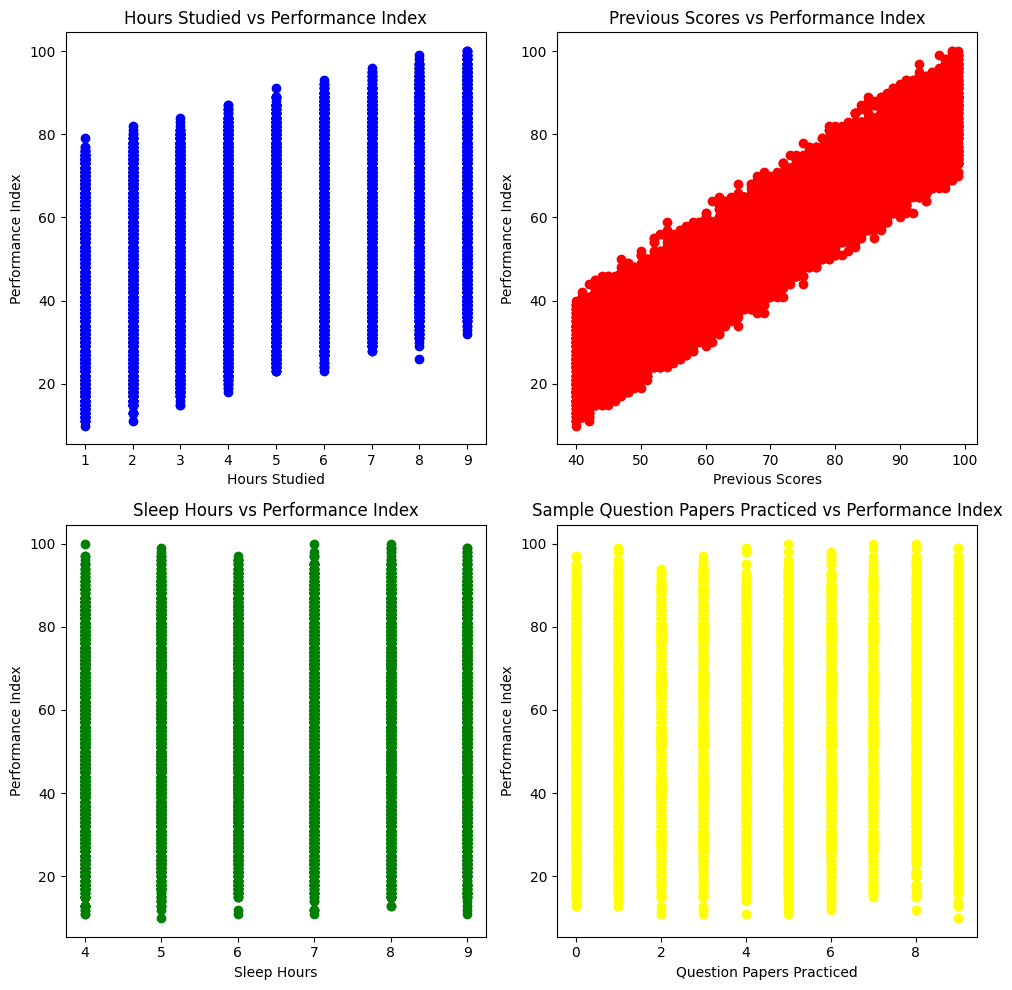

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# First subplot
axs[0, 0].scatter(df["Hours Studied"], df["Performance Index"], color="blue")
axs[0, 0].set_title('Hours Studied vs Performance Index')
axs[0, 0].set_ylabel('Performance Index')
axs[0, 0].set_xlabel('Hours Studied')

# Second subplot
axs[0, 1].scatter(df["Previous Scores"], df["Performance Index"], color="red")
axs[0, 1].set_title('Previous Scores vs Performance Index')
axs[0, 1].set_ylabel('Performance Index')
axs[0, 1].set_xlabel('Previous Scores')

# Third subplot
axs[1, 0].scatter(df["Sleep Hours"], df["Performance Index"], color="green")
axs[1, 0].set_title('Sleep Hours vs Performance Index')
axs[1, 0].set_ylabel('Performance Index')
axs[1, 0].set_xlabel('Sleep Hours')

# Fourth subplot
axs[1, 1].scatter(df["Sample Question Papers Practiced"], df["Performance Index"], color="yellow")
axs[1, 1].set_title('Sample Question Papers Practiced vs Performance Index')
axs[1, 1].set_ylabel('Performance Index')
axs[1, 1].set_xlabel('Question Papers Practiced')

plt.tight_layout()
plt.show()


In [7]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

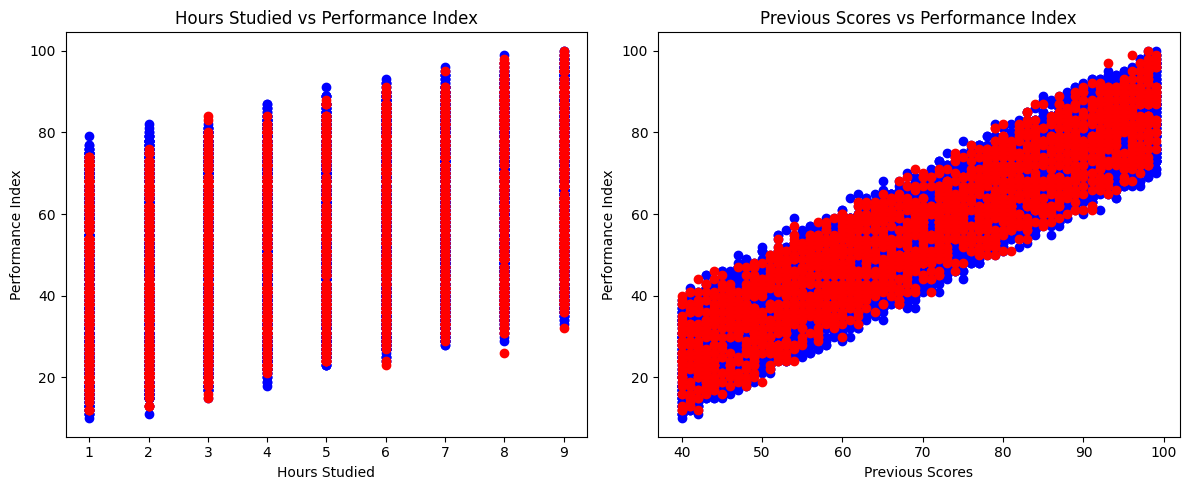

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot for "Hours Studied" vs "Performance Index"
ax1.scatter(train["Hours Studied"], train["Performance Index"], color="blue", label="Train")
ax1.scatter(test["Hours Studied"], test["Performance Index"], color="red", label="Test")
ax1.set_ylabel("Performance Index")
ax1.set_xlabel("Hours Studied")
ax1.set_title("Hours Studied vs Performance Index")

# Second subplot for "Previous Scores" vs "Performance Index"
ax2.scatter(train["Previous Scores"], train["Performance Index"], color="blue", label="Train")
ax2.scatter(test["Previous Scores"], test["Performance Index"], color="red", label="Test")
ax2.set_ylabel("Performance Index")
ax2.set_xlabel("Previous Scores")
ax2.set_title("Previous Scores vs Performance Index")

# Display the plots
plt.tight_layout()
plt.show()

Find the best fitted line based on distribution of data. 

In [9]:
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours Studied' , 'Previous Scores']])
train_y = np.asanyarray(train[['Performance Index']])
reg.fit(train_x, train_y)

print("Coefficients:\t", reg.coef_)
print("Intercept:\t", reg.intercept_)

Coefficients:	 [[2.85276154 1.02013356]]
Intercept:	 [-29.85960894]


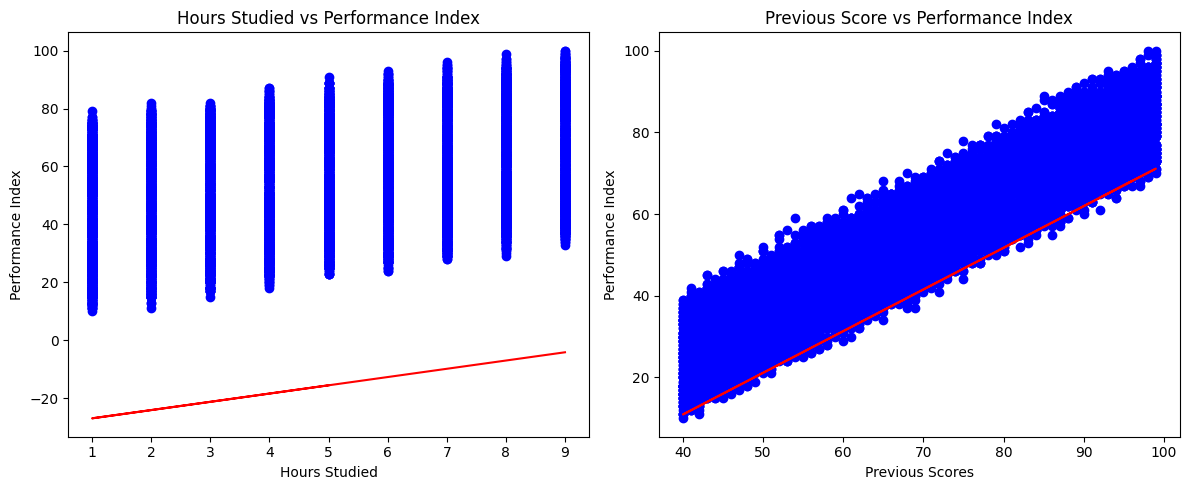

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(train["Hours Studied"], train["Performance Index"], color="blue")

filtered_train_x = train_x[train_x <= 9]
if len(filtered_train_x) > 0:
    ax1.plot(filtered_train_x, reg.coef_[0][0]*filtered_train_x + reg.intercept_[0], "-r")
ax1.set_ylabel("Performance Index")
ax1.set_xlabel("Hours Studied")
ax1.set_title("Hours Studied vs Performance Index")

ax2.scatter(train["Previous Scores"], train["Performance Index"], color="blue")

filtered_train_x = train_x[train_x >= 40]
if len(filtered_train_x) > 0:
    ax2.plot(filtered_train_x, reg.coef_[0][1]*filtered_train_x + reg.intercept_[0], "-r")
ax2.set_ylabel("Performance Index")
ax2.set_xlabel("Previous Scores")
ax2.set_title("Previous Score vs Performance Index")

plt.tight_layout()
plt.show()

>__NOTE: The reason of the above regression behavior is that its fitted by effects of both parameters but I show them one by one.

Testing model based on Test data. Measure the R2 and MSE.

In [11]:
test_x = np.asanyarray(test[['Hours Studied' , 'Previous Scores']])
test_y = np.asanyarray(test[['Performance Index']])

test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean(test_y_ - test_y)**2)
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 1.85
Residual sum of squares (MSE): 0.00
R2-score: 0.99
